# Проектная работа

## Загрузка и обработка текстовых данных

In [1]:
import os
from IPython.display import clear_output

dir_export = 'export'
os.makedirs(dir_export, exist_ok=True)

dir_import = 'import'
os.makedirs(dir_import, exist_ok=True)

### Импорт библиотек

In [2]:
from collections import defaultdict
import csv
from datetime import datetime
import string
import re
from tqdm import tqdm

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from pymystem3 import Mystem

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aleksioprime/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Чтение текстовых данных в групппированный словарь сообщений

```
[
  'id пользователя',
  [
    {
      'text': Текст сообщения,
      'date': Дата сообщения
    },
      ...
  ]
  ...
]
```

In [3]:
def read_and_group_messages_by_user(csv_filename):
    user_messages = defaultdict(list)
    user_name = dict()

    with open(csv_filename, mode='r', encoding='utf-8') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        for row in csv_reader:
            user_id = row['user_id']
            message = row['message']
            # Преобразование строки в объект datetime
            date = datetime.fromisoformat(row['date']).strftime('%d.%m.%Y %H:%M:%S')
            user_messages[user_id].append({
                'text': message,
                'date': date,
            })
            user_name[user_id] = {
                'username': row['username'],
                'fullname': row['fullname'],
            }
    
    return user_messages, user_name
    
messages_filename = os.path.join(dir_import, "messages.csv")
grouped_messages, users = read_and_group_messages_by_user(messages_filename)

### Вывод ID пользователей

In [4]:
for user_id in grouped_messages.keys():
    print(f"{user_id}:\t@{users[user_id]['username'] or '-'} ({users[user_id]['fullname'] or '-'})")

536537422:	@Akuzmina1 (Анастасия Владимировна Кузьмина)
348300010:	@liudmila_Zaitceva (Людмила Геннадьевна Зайцева)
523294197:	@- (Елена Александровна Андреева)
797324924:	@girlangelette (Анна Андреевна Пермякова)
299520702:	@ild714 (Ильдар Ильясович Нигметзянов)
1665011223:	@- (Роман Викторович Петушков)
942185559:	@uliahromova (Юлия Геннадьевна Улина)
38156317:	@AndreySamosdov (Андрей Андреевич Самосадов)


### Выбор пользователя для тестов

In [5]:
user_id = '536537422'
user = f"@{users[user_id]['username'] or '-'} ({users[user_id]['fullname'] or '-'})"

### Вывод всех сообщений пользователя

In [6]:
print(f"Сообщения от пользователя ID {user_id} ({user}): ")
for message in grouped_messages[user_id]:
    print(f" - {message['date']} {message['text']}")

Сообщения от пользователя ID 536537422 (@Akuzmina1 (Анастасия Владимировна Кузьмина)): 
 - 16.05.2024 06:11:56 Спасибо большое❤️
 - 16.05.2024 05:58:32 🙏🏼🙏🏼
 - 16.05.2024 05:58:27 Людмила Геннадьевна, а могу попросить открыть 4024
 - 16.05.2024 05:56:30 ?
 - 16.05.2024 05:56:29 Коллеги, а кто-то уже есть в школе,
 - 26.04.2024 07:50:50 Коллеги, кто сейчас в школе?
 - 10.04.2024 09:01:19 Коллеги, кто в школе?
 - 09.04.2024 12:37:12 У нас сегодня мероприятие недели кафедры - квиз  Она не смогла бы участвовать, я ей вышлю задание
 - 04.04.2024 08:58:13 Алексею
 - 04.04.2024 08:58:01 Маленький капучино
 - 04.04.2024 08:57:53 170
 - 04.04.2024 08:56:43 Коллеги кто-то хочет кофе ?
 - 04.04.2024 08:20:00 А можно было в зуме?
 - 04.04.2024 08:19:21 Буду через 5 минут
 - 04.04.2024 08:18:52 ❗️Коллеги, ждем вас на проверке юнитов MYP
 - 03.04.2024 14:14:07 Отложенная публикация о нашей недели
 - 03.04.2024 12:45:19 ❗️Предупредите всех своих подопечных о том, что предзащита проектов на конференци

### Обработка текста

```
[
  'id пользователя',
  [
    {
      'text': Текст сообщения,
      'date': Дата сообщения,
      'tokens': Обработанный текст
    },
      ...
  ]
  ...
]
```

In [7]:
def text_processing(text):
    translator = str.maketrans('', '', string.punctuation)
    stop_set = set(stopwords.words('russian'))
    mystem = Mystem()
    
    words = text.lower().translate(translator).split()
    words_onlyrus = re.findall(r'\b[а-яА-Я]+\b', text.lower())
    tokens = list(filter(lambda x: x not in {' ', '\n'} | stop_set, words_onlyrus))
    # tokens = mystem.lemmatize(' '.join(tokens))
    return tokens

for user_messages in grouped_messages.values():
    print(f'Обработка сообщений пользователя {user_id}:')
    for message in tqdm(user_messages):
        message['tokens'] = text_processing(message['text'])

print(f"Сообщения от пользователя ID {user_id} ({user}): ")
for message in grouped_messages[user_id]:
    print(f" - {message['date']} {message['tokens']}")

Обработка сообщений пользователя 536537422:


100%|██████████| 796/796 [00:00<00:00, 10052.04it/s]


Обработка сообщений пользователя 536537422:


100%|██████████| 431/431 [00:00<00:00, 13690.89it/s]


Обработка сообщений пользователя 536537422:


100%|██████████| 58/58 [00:00<00:00, 8437.78it/s]


Обработка сообщений пользователя 536537422:


100%|██████████| 500/500 [00:00<00:00, 14275.95it/s]


Обработка сообщений пользователя 536537422:


100%|██████████| 131/131 [00:00<00:00, 13241.77it/s]


Обработка сообщений пользователя 536537422:


100%|██████████| 259/259 [00:00<00:00, 13788.30it/s]


Обработка сообщений пользователя 536537422:


100%|██████████| 143/143 [00:00<00:00, 11901.92it/s]


Обработка сообщений пользователя 536537422:


100%|██████████| 50/50 [00:00<00:00, 10993.67it/s]

Сообщения от пользователя ID 536537422 (@Akuzmina1 (Анастасия Владимировна Кузьмина)): 
 - 16.05.2024 06:11:56 ['спасибо', 'большое']
 - 16.05.2024 05:58:32 []
 - 16.05.2024 05:58:27 ['людмила', 'геннадьевна', 'могу', 'попросить', 'открыть']
 - 16.05.2024 05:56:30 []
 - 16.05.2024 05:56:29 ['коллеги', 'школе']
 - 26.04.2024 07:50:50 ['коллеги', 'школе']
 - 10.04.2024 09:01:19 ['коллеги', 'школе']
 - 09.04.2024 12:37:12 ['сегодня', 'мероприятие', 'недели', 'кафедры', 'квиз', 'смогла', 'участвовать', 'вышлю', 'задание']
 - 04.04.2024 08:58:13 ['алексею']
 - 04.04.2024 08:58:01 ['маленький', 'капучино']
 - 04.04.2024 08:57:53 []
 - 04.04.2024 08:56:43 ['коллеги', 'хочет', 'кофе']
 - 04.04.2024 08:20:00 ['зуме']
 - 04.04.2024 08:19:21 ['буду', 'минут']
 - 04.04.2024 08:18:52 ['коллеги', 'ждем', 'проверке', 'юнитов']
 - 03.04.2024 14:14:07 ['отложенная', 'публикация', 'нашей', 'недели']
 - 03.04.2024 12:45:19 ['предупредите', 'своих', 'подопечных', 'предзащита', 'проектов', 'конференцию', '

### Объединение всех сообщений каждого пользователя

In [8]:
user_all_messages = {}
for user, user_messages in grouped_messages.items():
    user_all_messages[user] = " ".join([" ".join(msg['tokens']) for msg in user_messages])

print(f"Текст сообщений от пользователя ID {user_id} ({user}): ")
print(user_all_messages[user_id])

Текст сообщений от пользователя ID 536537422 (38156317): 
спасибо большое  людмила геннадьевна могу попросить открыть  коллеги школе коллеги школе коллеги школе сегодня мероприятие недели кафедры квиз смогла участвовать вышлю задание алексею маленький капучино  коллеги хочет кофе зуме буду минут коллеги ждем проверке юнитов отложенная публикация нашей недели предупредите своих подопечных предзащита проектов конференцию состоится вторник кабинете коллеги подтвердите реакцией свои мероприятия недели нашей кафедры напишите личку исправить добавить коллеги очень жду информацию названиях мероприятий каких классах какими уроками обратно автобусе пойдемте пробздимся выходим обед коллеги пойдет орбион супом детских травм описание  уважаемые коллеги нашла интересные тесты займет минут вашего времени приходите результатами обсудим коллеги график проветривания учетом перемен уроков средней старшей школы посмотрит пригодиться коллеги школе приходите угощайтесь всякое съестное школе завтра повторим

## Частота вхождения слов в текст

### Установка библиотек

In [9]:
!pip install matplotlib
!pip install pandas
!pip install openpyxl
!pip install wordcloud
clear_output()

### Импорт библиотек

In [10]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
from IPython.display import display, HTML
from wordcloud import WordCloud

### Выбор пользователя

In [11]:
user_id = '536537422'
user = f"@{users[user_id]['username'] or '-'} ({users[user_id]['fullname'] or '-'})"
text_user = user_all_messages[user_id]

### Нахождение количества слов в тексте

In [12]:
blob = TextBlob(text_user)
items = blob.word_counts.items()
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

### Вывод частоты слов в тексте в виде таблицы

In [13]:
df = pd.DataFrame(sorted_items, columns=['word', 'count'])
export_xlsx = os.path.join(dir_export, f"words-{user_id}.xlsx")
df.to_excel(export_xlsx)
print(f"Таблица частоты слов пользователя с ID {user_id} ({user}): ")
display(HTML(df.to_html(index=False)))

Таблица частоты слов пользователя с ID 536537422 (@Akuzmina1 (Анастасия Владимировна Кузьмина)): 


word,count
коллеги,123
спасибо,43
это,31
кафедры,29
завтра,26
класс,25
минут,23
очень,22
сегодня,19
недели,19


### Вывод частоты слов в тексте в виде гистограммы

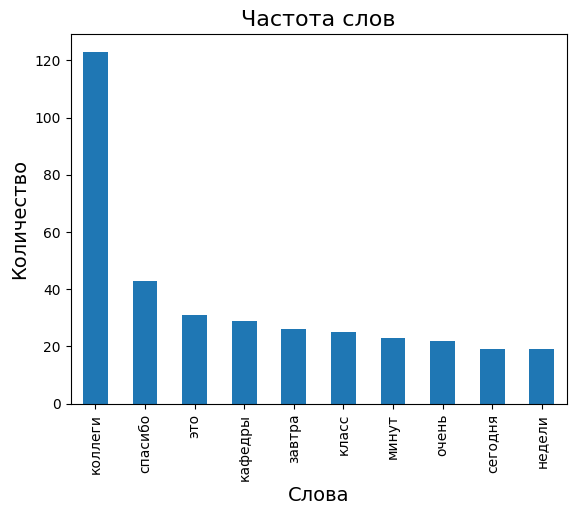

In [14]:
axes = df[:10].plot.bar(x='word', y='count', legend=False)
# Добавление заголовка и меток осей
axes.set_title('Частота слов', fontsize=16)
axes.set_xlabel('Слова', fontsize=14)
axes.set_ylabel('Количество', fontsize=14)
# Сохранение диаграммы
export_plt = os.path.join(dir_export, f"words-{user_id}.png")
plt.savefig(export_plt)
# Вывод диаграммы на экран
plt.show()

### Создание словарного облака

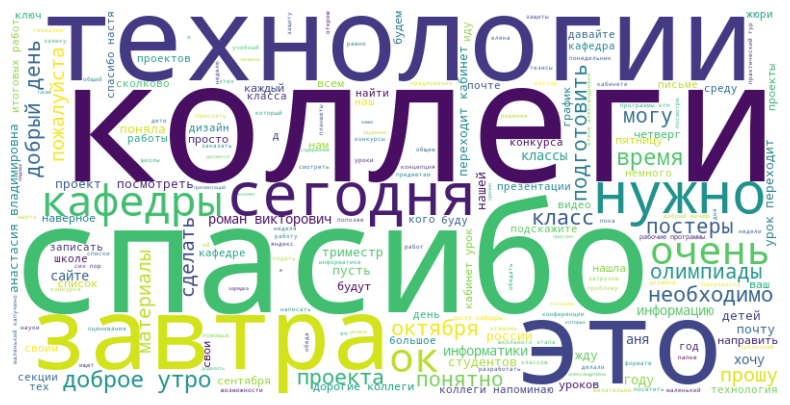

In [15]:
# Создание объекта WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud = wordcloud.generate(list(user_all_messages.values())[1])

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Анализ тональности текста

### Установка библиотек

In [16]:
!pip install torch
!pip install transformers
clear_output()

### Импорт библиотек

In [17]:
import torch
from transformers import AutoModelForSequenceClassification
from transformers import BertTokenizerFast
from transformers import pipeline

import spacy
from nltk import Tree
from spacy import displacy
import ru_core_news_lg

/opt/anaconda3/envs/analyze/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Составление набора топ-100 слов пользователя

In [18]:
top_words = " ".join(list(map(lambda x: x[0], sorted_items))[:100])
print(top_words)

коллеги спасибо это кафедры завтра класс минут очень сегодня недели жду викторович информатике кофе пожалуйста время необходимо прошу ктп большое роман буду студентов также нужно классы школе уроков года технологии нашей график день кому гимназии кафедре олимпиады всем проектов информацию году пока напоминаю ура конца сентября хочет классах обед пусть срочно уроки могу кабинете будем информатики будут программы готова задачи работы просто этап классов рп яндекс год информатика геннадьевна мероприятия рождения коллег ключ информация неделе план которые андрей предлагаю дня никто который вопрос октября олимпиада таблицу подготовка людмила анастасия владимировна возможность могут андреевич новый отправляю группе ок классе уроках учителей


### Анализ тональности
https://huggingface.co/blanchefort/rubert-base-cased-sentiment

In [19]:
tokenizer = BertTokenizerFast.from_pretrained('blanchefort/rubert-base-cased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('blanchefort/rubert-base-cased-sentiment', return_dict=True)
labels = ['Нейтральный', 'Позитивный', 'Негативный']

@torch.no_grad()
def predict(text):
    inputs = tokenizer(text, max_length=512, padding=True, truncation=True, return_tensors='pt')
    outputs = model(**inputs)
    predicted = torch.nn.functional.softmax(outputs.logits, dim=1)
    return predicted

probabilities = predict(top_words)
for label, prob in zip(labels, probabilities[0]):
    print(f"{label}: {prob:.4f}")

Нейтральный: 0.0275
Позитивный: 0.9653
Негативный: 0.0071


### Анализ токсичности
https://huggingface.co/IlyaGusev/rubertconv_toxic_clf

In [20]:
model_name = "IlyaGusev/rubertconv_toxic_clf"
pipe = pipeline("text-classification", model=model_name, tokenizer=model_name, framework="pt") 
pipe([top_words])

[{'label': 'neutral', 'score': 0.9995995163917542}]

## Дополнительные задачи

Другие модели для анализа текста можно посмотреть на сайте:
https://huggingface.co/models?pipeline_tag=text-classification&language=ru&sort=trending

### Текст для тестов

In [ ]:
import_text = os.path.join(dir_import, "new.txt")
with open(import_text, 'r', encoding='utf-8') as file:
    content = file.read()
print(content)

### Резюме статьи
https://huggingface.co/utrobinmv/t5_summary_en_ru_zh_base_2048

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model_name = 'utrobinmv/t5_summary_en_ru_zh_base_2048'
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

prefix = 'summary: '
src_text = prefix + content
input_ids = tokenizer(src_text, return_tensors="pt")

generated_tokens = model.generate(**input_ids)

result = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
print(result)

# text brief summary generate
prefix = 'summary brief: '
src_text = prefix + content
input_ids = tokenizer(src_text, return_tensors="pt")

generated_tokens = model.generate(**input_ids)

result = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
print(result)

# text big summary generate
prefix = 'summary big: '
src_text = prefix + content
input_ids = tokenizer(src_text, return_tensors="pt")

generated_tokens = model.generate(**input_ids)

result = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
print(result)